# Milestone 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

## Load tables

In [2]:
df_plot = pd.read_csv("data/MovieSummaries/plot_summaries.txt", sep='\t', header=None, names=["wikiID", "plot"])

df_meta = pd.read_csv("data/MovieSummaries/movie.metadata.tsv", sep='\t', header=None, 
    names=["wikiID", "freeID", "name", "release_date", "revenue", "runtime", "languages", "countries", "genres"])

df_char = pd.read_csv("data/MovieSummaries/character.metadata.tsv", sep='\t',header=None, 
    names=["WikiID", "freeID", "release_date", "char_name", "actor_DOB", "actor_gender", "actor_height", "actor_ethnicity",
           "actor_name", "Actor_age", "freeID_char_map", "FreeID_char", "FreeID_actor"])

df_char_names = pd.read_csv('data/MovieSummaries/name.clusters.txt', sep="\t", header=None, 
    names=["char_name", "freeID_char_map"])

df_tropes = pd.read_csv('data/MovieSummaries/tvtropes.clusters.txt', sep='\t', header=None, names=["trope", "details"])

## Look at the data

In [3]:
df_plot.head()

,wikiID,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [4]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42303 entries, 0 to 42302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   wikiID  42303 non-null  int64 
 1   plot    42303 non-null  object
dtypes: int64(1), object(1)
memory usage: 661.1+ KB


In [5]:
df_meta.head()

,wikiID,freeID,name,release_date,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [6]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   wikiID        81741 non-null  int64  
 1   freeID        81741 non-null  object 
 2   name          81741 non-null  object 
 3   release_date  74839 non-null  object 
 4   revenue       8401 non-null   float64
 5   runtime       61291 non-null  float64
 6   languages     81741 non-null  object 
 7   countries     81741 non-null  object 
 8   genres        81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


In [7]:
df_char.head()

,WikiID,freeID,release_date,char_name,actor_DOB,actor_gender,actor_height,actor_ethnicity,actor_name,Actor_age,freeID_char_map,FreeID_char,FreeID_actor
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [8]:
df_char.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450669 entries, 0 to 450668
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   WikiID           450669 non-null  int64  
 1   freeID           450669 non-null  object 
 2   release_date     440674 non-null  object 
 3   char_name        192794 non-null  object 
 4   actor_DOB        344524 non-null  object 
 5   actor_gender     405060 non-null  object 
 6   actor_height     154824 non-null  float64
 7   actor_ethnicity  106058 non-null  object 
 8   actor_name       449441 non-null  object 
 9   Actor_age        292556 non-null  float64
 10  freeID_char_map  450669 non-null  object 
 11  FreeID_char      192804 non-null  object 
 12  FreeID_actor     449854 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 44.7+ MB


In [9]:
df_char_names.head()

,char_name,freeID_char_map
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


In [10]:
df_char_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   char_name        2666 non-null   object
 1   freeID_char_map  2666 non-null   object
dtypes: object(2)
memory usage: 41.8+ KB


In [11]:
df_tropes.head()

,trope,details
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."


In [12]:
df_tropes = df_tropes.drop(["details"], axis=1).join(pd.json_normalize(df_tropes["details"].map(json.loads).tolist())).rename(
    columns={"id":"freeID_char_map"})

In [13]:
df_tropes.head()

,trope,char,movie,freeID_char_map,actor
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


In [14]:
df_tropes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   trope            501 non-null    object
 1   char             501 non-null    object
 2   movie            501 non-null    object
 3   freeID_char_map  501 non-null    object
 4   actor            501 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


In [15]:
df_tropes.head()

,trope,char,movie,freeID_char_map,actor
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


## Join the dataframes

The feature connecting dataframes together is the Wikipedia ID. Also there are more metadatas of movies (81741 movies) than plots (42303 movies). We will only keep the metadatas of the movies we know the plot of.

In [16]:
df_full = df_meta.merge(df_plot, how='inner', on="wikiID")
df_full.head()

,wikiID,freeID,name,release_date,revenue,runtime,languages,countries,genres,plot
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th..."
1,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...
2,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra..."
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...","Every hundred years, the evil Morgana returns..."
4,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...","Adam, a San Francisco-based artist who works a..."


Only a small fraction of the characters have been labellised with a trope (500), compared to the number of unlabeled (450669). Here is the dataframe containing the characters with trope

In [17]:
df_inner_char = df_char.merge(df_tropes, how='inner', on='freeID_char_map')

In [18]:
df_inner_char.drop(columns=["char","actor"],inplace=True)
df_inner_char.head()

,WikiID,freeID,release_date,char_name,actor_DOB,actor_gender,actor_height,actor_ethnicity,actor_name,Actor_age,freeID_char_map,FreeID_char,FreeID_actor,trope,movie
0,196176,/m/01bwgr,1971-11-03,David Sumner,1937-08-08,M,1.66,/m/041rx,Dustin Hoffman,34.0,/m/0k3v65,/m/0ch916z,/m/0bl2g,tranquil_fury,Straw Dogs
1,1157158,/m/04c13q,2002-03-29,Sheldon Mopes,1969-08-18,M,1.83,NaN,Edward Norton,32.0,/m/0jx3b8,/m/0gy99_8,/m/01515w,granola_person,Death to Smoochy
2,504242,/m/02j9_2,2005-08-22,Mr. Universe,1978-05-15,M,1.68,/m/041rx,David Krumholtz,27.0,/m/0k31lb,/m/02sgjdt,/m/05cx7x,playful_hacker,Serenity
3,6917005,/m/0gwypk,2003-02-16,Harold Hill,1962-03-21,M,1.73,/m/041rx,Matthew Broderick,40.0,/m/04hv61w,/m/09j606t,/m/01vlj1g,charmer,The Music Man
4,6917005,/m/0gwypk,2003-02-16,Harold Hill,1962-03-21,M,1.73,/m/041rx,Matthew Broderick,40.0,/m/04hv61w,/m/09j606t,/m/01vlj1g,loveable_rogue,The Music Man


In [19]:
from xml.dom import minidom

# parse an xml file by name
file = minidom.parse('data/corenlp_plot_summaries/3217.txt.xml')
print(file)

## Exploratory data analysis

### Genres, languages and countries

In [54]:
def fcount(df):
    df2 = pd.DataFrame(data={
        'id': df.apply(lambda x: list(json.loads(x).keys())),
        'name': df.apply(lambda x: list(json.loads(x).values()))
    })
    
    distinctf = []
    counter = []

    for i in range(df2.shape[0]):
        fid = df2["id"].iloc[i]
        fname = df2["name"].iloc[i]
        for j in range(len(fid)):
            if [fid[j], fname[j]] not in distinctf:
                distinctf.append([fid[j], fname[j]])
                counter.append(1)
            else:
                counter[distinctf.index([fid[j], fname[j]])] += 1
                
    new = pd.DataFrame(data={
        'id': [s[0] for s in distinctf],
        'name': [s[1] for s in distinctf],
        'count': counter
    })
    
    return new.sort_values(by="count", ascending=False, ignore_index=True)

In [55]:
df_genre = fcount(df_meta["genres"])
df_genre.head()

,id,name,count
0,/m/07s9rl0,Drama,34007
1,/m/01z4y,Comedy,16349
2,/m/02l7c8,Romance Film,10234
3,/m/01g6gs,Black-and-white,9094
4,/m/02kdv5l,Action,8798


In [56]:
df_lang = fcount(df_meta["languages"])
df_lang.head()

,id,name,count
0,/m/02h40lc,English Language,40891
1,/m/03k50,Hindi Language,3744
2,/m/06nm1,Spanish Language,3673
3,/m/064_8sq,French Language,3422
4,/m/06ppq,Silent film,3183


In [57]:
df_country = fcount(df_meta["countries"])
df_country.head()

,id,name,count
0,/m/09c7w0,United States of America,34408
1,/m/03rk0,India,8411
2,/m/07ssc,United Kingdom,7868
3,/m/0f8l9c,France,4395
4,/m/03rjj,Italy,3163


### Runtime distribution

In [65]:
print(df_meta['runtime'].max())

1079281.0


This is strange.

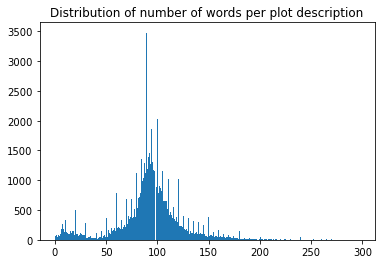

In [67]:
n_bins = 300

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(df_meta[df_meta['runtime'] < 300]['runtime'], bins=n_bins)
ax.set_title('Distribution of number of words per plot description')

plt.show()

### Distribution of number of words in plot description

In [117]:
#use raw plot_summaries and count nb of words in each plot 
df_plot_copy = df_plot.copy()
df_plot_copy['nb_words'] = df_plot_copy['plot'].apply(lambda n: len(n.split()))
df_plot_copy.head(3)

,wikiID,plot,nb_words
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",25
1,31186339,The nation of Panem consists of a wealthy Capi...,778
2,20663735,Poovalli Induchoodan is sentenced for six yea...,496


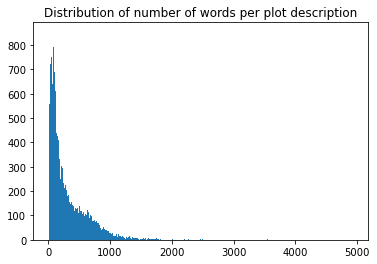

In [118]:
n_bins = 1000

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(df_plot_copy['nb_words'], bins=n_bins)
ax.set_title('Distribution of number of words per plot description')

plt.show()

Only keep the plots with less than 2000 words (which interval?)

In [119]:
threshold = 2000
df_plot_copy = df_plot_copy.loc[df_plot_copy['nb_words'] < threshold]

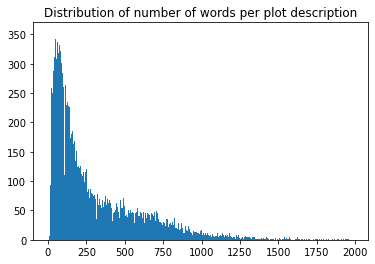

In [120]:
n_bins = 1000

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(df_plot_copy['nb_words'], bins=n_bins)
ax.set_title('Distribution of number of words per plot description')


plt.show()

What would be the minimum number of words to find senseful topic extraction?  

* characters by film distribition: how many characters have been labelised for each film?

In [121]:
df_char_copy = df_char[['freeID','FreeID_actor']].copy()
df_char_copy = df_char_copy.groupby(['freeID']).size().reset_index(name='counts')
df_char_copy.head(5)

,freeID,counts
0,/m/011_mj,9
1,/m/011_p6,5
2,/m/011_zy,4
3,/m/011wtv,18
4,/m/011x_4,20


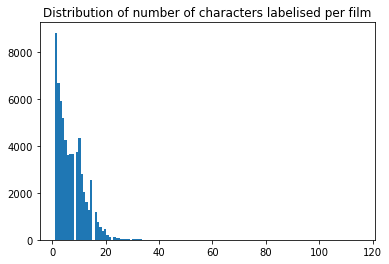

In [126]:
n_bins = 130

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(df_char_copy['counts'], bins=n_bins)
ax.set_title('Distribution of number of characters labelised per film')

plt.show()

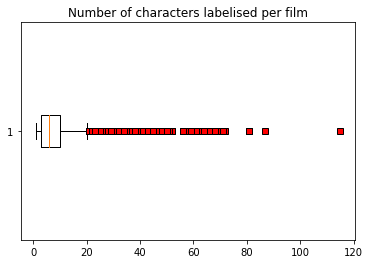

1rst quartile, median and 3rd quartile values: 
0.25     3.0
0.50     6.0
0.75    10.0
Name: counts, dtype: float64


In [86]:
n_bins = 200
red_square = dict(markerfacecolor='r', marker='s')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(df_char_copy['counts'],vert=False, flierprops=red_square)
ax.set_title('Number of characters labelised per film')
plt.show()
print("1rst quartile, median and 3rd quartile values: ")
print(df_char_copy['counts'].quantile([0.25,0.5,0.75]))


"Hemingway & Gellhorn" has more than 115 characters labelised! 

In [87]:
df_char_copy.loc[df_char_copy['counts'] > 100].head(10)

,freeID,counts
46351,/m/0cc8620,115


## CoreNLP

In [129]:
import gzip
import os

path = "data/corenlp_plot_summaries/"
files = os.listdir(path)
print(files[0])
f = gzip.open(path+files[0], 'rb')

test = f.read().decode()
# print(test)

10000053.xml.gz


In [ ]:
from bs4 import BeautifulSoup

Bs_data = BeautifulSoup(test, "xml")
 
print(Bs_data.find("sentence", {'id':'20'}).find('NER').text)